In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import csv
import os

from scipy.interpolate import make_interp_spline
import rpy2.robjects as robjects
import pyreadr
import matplotlib.cm as cm
color_map  = cm.get_cmap('tab20c')

from collections import defaultdict


In [2]:
def remove_outlier(data_list, a=2):
    mean = np.mean(data_list)
    std = np.std(data_list)
    keep = np.intersect1d(np.where(data_list <= mean + a*std)[0], np.where(data_list >= mean - a*std)[0])
    keep = np.array(keep)

    out = [data_list[x] for x in keep]
    return out

In [3]:
def load_data(type,rate,path,p, N_list):
    listKeys = ['maxAnorm', 'maxBnorm', 'maxAnorm_nor', 'maxBnorm_nor', 'avgAnorm_nor', 'avgBnorm_nor','avgAnorm', 'avgBnorm', 'iniAnorm', 'iniAnorm_nor']
    data_N = {}
    for n in N_list:
        data_N[n] = {key:[] for key in listKeys}
    #print(data_N)
    id = np.arange(20)+1
    for i in id:
        with open(path+"model3_{}_p{}__rate{}_ss{}_ss_run2_res.csv".format(type,p, rate, i), newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                #print('N:',row['N'])

                A_norm = row['maxAnorm'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['N'])]['maxAnorm'].append(min(Am))

                B_norm = row['maxBnorm'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_N[int(row['N'])]['maxBnorm'].append(min(B))

                A_norm = row['maxAnorm'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['N'])]['iniAnorm'].append(Am[0])

                A_norm = row['maxAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['N'])]['iniAnorm_nor'].append(Am[0])


                A_norm = row['maxAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['N'])]['maxAnorm_nor'].append(min(Am))

                B_norm = row['maxBnorm_nor'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_N[int(row['N'])]['maxBnorm_nor'].append(min(B))


                A_norm = row['avgAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['N'])]['avgAnorm_nor'].append(min(Am))

                B_norm = row['avgBnorm_nor'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_N[int(row['N'])]['avgBnorm_nor'].append(min(B))

                A_norm = row['avgAnorm'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['N'])]['avgAnorm'].append(min(Am))

                B_norm = row['avgBnorm'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_N[int(row['N'])]['avgBnorm'].append(min(B))


    """

    data_R = {}
    for n in [5, 10, 50, 100,150,200,250,300,350,400, 500, 1000, 5000, 10000]:
        data_R[n] = {key:[] for key in listKeys}
    #print(data_N)
    id = np.arange(20)+1
    for i in id:
        with open(path+"model3_{}_p100__rate{}_ss{}_random_run2_res.csv".format(type,rate, i), newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                #print('N:',row['N'])

                A_norm = row['maxAnorm'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_R[int(row['N'])]['maxAnorm'].append(min(Am))

                B_norm = row['maxBnorm'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_R[int(row['N'])]['maxBnorm'].append(min(B))



                A_norm = row['maxAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_R[int(row['N'])]['maxAnorm_nor'].append(min(Am))

                B_norm = row['maxBnorm_nor'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_R[int(row['N'])]['maxBnorm_nor'].append(min(B))


                A_norm = row['avgAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_R[int(row['N'])]['avgAnorm_nor'].append(min(Am))

                B_norm = row['avgBnorm_nor'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_R[int(row['N'])]['avgBnorm_nor'].append(min(B))


    """


    data_T = {}
    for n in N_list:
        data_T[n] = {key:[] for key in listKeys}
    #print(data_N)
    id = np.arange(20)+1
    for i in id:
        with open(path+"model3_{}_p{}__rate{}_ss{}_trueparam_run2_res.csv".format(type, p, rate, i), newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                #print('N:',row['N'])

                A_norm = row['maxAnorm'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_T[int(row['N'])]['maxAnorm'].append(min(Am))

                B_norm = row['maxBnorm'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_T[int(row['N'])]['maxBnorm'].append(min(B))

                A_norm = row['maxAnorm'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_T[int(row['N'])]['iniAnorm'].append(Am[0])

                A_norm = row['maxAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_T[int(row['N'])]['iniAnorm_nor'].append(Am[0])

                A_norm = row['maxAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_T[int(row['N'])]['maxAnorm_nor'].append(min(Am))

                B_norm = row['maxBnorm_nor'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_T[int(row['N'])]['maxBnorm_nor'].append(min(B))


                A_norm = row['avgAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_T[int(row['N'])]['avgAnorm_nor'].append(min(Am))

                B_norm = row['avgBnorm_nor'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_T[int(row['N'])]['avgBnorm_nor'].append(min(B))

                A_norm = row['avgAnorm'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_T[int(row['N'])]['avgAnorm'].append(min(Am))

                B_norm = row['avgBnorm'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_T[int(row['N'])]['avgBnorm'].append(min(B))

    return data_N,data_T

In [4]:
N50 =  [275, 305, 344, 393, 458, 550, 688, 917, 1376, 2752, 13761]
N100 = [324, 360, 405, 462, 540, 648, 810, 1080, 1620, 3240,16200]
N150 = [352, 391, 440, 503, 587, 705, 881, 1175, 1762, 3525, 17626]


import numpy as np

In [5]:



type='tridiag2'
rate=242
path  = "../../result_vision/results_samplesize2/p100_new/"
p = 100
data100_N2, data100_T2 = load_data(type,rate,path, p, N100)


type='tridiag3'
rate=242
path  = "../../result_vision/results_samplesize2/p100_new/"
p = 100
data100_N3, data100_T3 = load_data(type,rate,path, p, N100)


type='tridiag1'
rate=142
path  = "../../result_vision/results_samplesize2/p100_latest/"
p = 100
data100_N1, data100_T1 = load_data(type,rate,path, p, N100)


In [6]:
N100 = [324, 405, 540, 810, 1620, 3240,16200]


In [7]:



type='tridiag2'
rate=242
path  = "../../result_vision/results_samplesize2/p150_latest/"
p = 150
data150_N2, data150_T2 = load_data(type,rate,path, p, N150)


type='tridiag3'
rate=242
path  = "../../result_vision/results_samplesize2/p150_new/"
p = 150
data150_N3, data150_T3 = load_data(type,rate,path, p, N150)


type='tridiag1'
rate=142
path  = "../../result_vision/results_samplesize2/p150_latest/"
p = 150
data150_N1, data150_T1 = load_data(type,rate,path, p, N150)

In [8]:
N150 = [352, 440, 587, 881, 1762, 3525, 17626]


In [9]:



type='tridiag2'
rate=242
path  = "../../result_vision/results_samplesize2/p50_latest/"
p = 50
data50_N2, data50_T2 = load_data(type,rate,path, p, N50)


type='tridiag3'
rate=242
path  = "../../result_vision/results_samplesize2/p50_latest/"
p = 50
data50_N3, data50_T3 = load_data(type,rate,path, p, N50)


type='tridiag1'
rate=142
path  = "../../result_vision/results_samplesize2/p50_latest/"
p = 50
data50_N1, data50_T1 = load_data(type,rate,path, p, N50)

In [10]:
N50 =  [344, 458, 688, 1376, 2752, 13761]


In [13]:
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
m_size=7.5

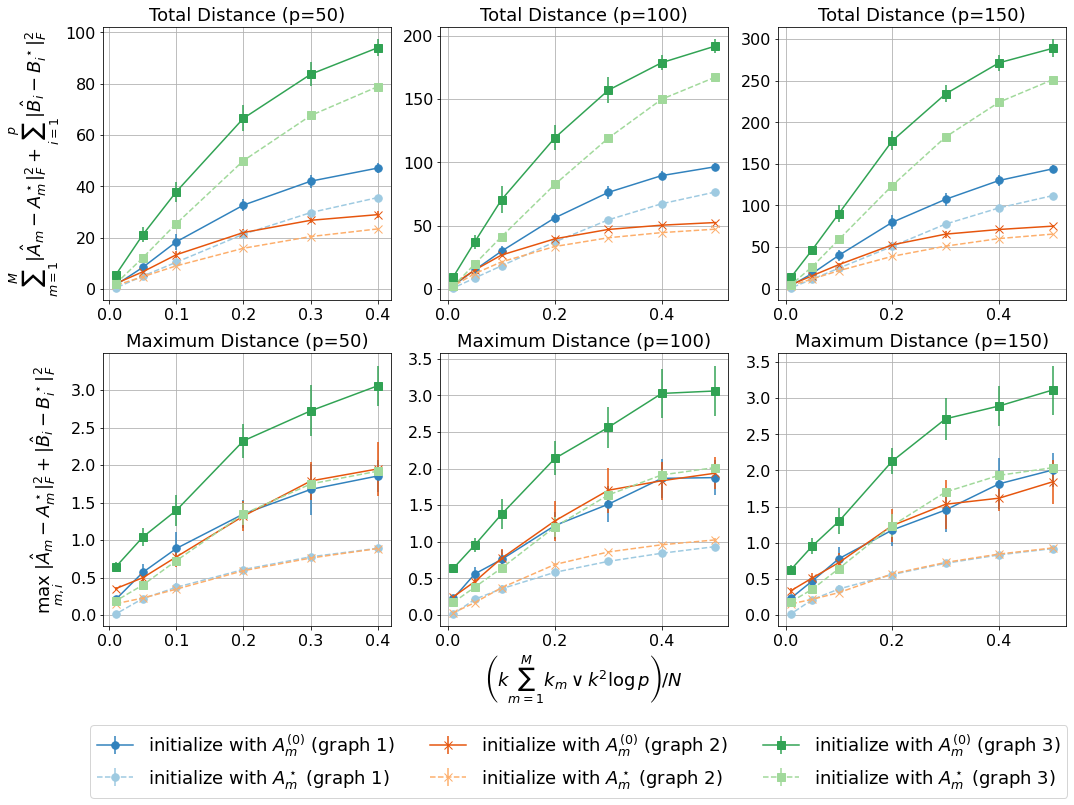

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

x_label = [(81*np.log10(50)/n) for n in N50]

b_mean = []
b_std = []
for n in N50:
    
    datazip = zip(data50_N1[n]['avgBnorm'],data50_N1[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,0].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-o',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 1)', color=color_map(0))

b_mean = []
b_std = []
for n in N50:
    
    datazip = zip(data50_T1[n]['avgBnorm'],data50_T1[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,0].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--o',markersize=m_size,  label=r'initialize with $A_m^\star$ (graph 1)', color=color_map(2))


b_mean = []
b_std = []
for n in N50:
    
    datazip = zip(data50_N2[n]['avgBnorm'],data50_N2[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,0].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-x',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 2)', color=color_map(4))

b_mean = []
b_std = []
for n in N50:
    
    datazip = zip(data50_T2[n]['avgBnorm'],data50_T2[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,0].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--x',markersize=m_size,  label=r'initialize with $A^\star_m$ (graph 2)', color=color_map(6))



b_mean = []
b_std = []
for n in N50:
    
    datazip = zip(data50_N3[n]['avgBnorm'],data50_N3[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,0].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-s',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 3)', color=color_map(8))

b_mean = []
b_std = []
for n in N50:
    
    datazip = zip(data50_T3[n]['avgBnorm'],data50_T3[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,0].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--s',markersize=m_size,  label=r'initialize with $A^\star_m$ (graph 3)', color=color_map(10))








ax[0,0].grid()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0,0].set_title('Total Distance (p=50)', fontsize=18)
ax[0,0].set_ylabel(r'$\sum_{m=1}^M\|\hat{A}_m-A_m^\star\|_F^2+\sum_{i=1}^p\|\hat{B}_i-B_i^\star\|_F^2$', fontsize=18)
#plt.xlabel(r'$\left(k\sum_{m=1}^M k_m\wedge k^2 \log p\right)/N$')
#ax[0].tight_layout()
#plt.savefig('tridiag3_p50_avg.png')


b_mean = []
b_std = []
a_mean = []
a_std = []
for n in N50:
    
    datazip = zip(data50_N1[n]['maxBnorm'],data50_N1[n]['maxAnorm'])
    AplusB1 = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB1), 2)))
    b_std.append(np.std(remove_outlier((AplusB1), 2)))

ax[1,0].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-o',markersize=m_size, label=r'initialize with ${A}_m^{(0)}$ (graph 1)', color=color_map(0))

b_mean = []
b_std = []

for n in N50:
    datazip = zip(data50_T1[n]['maxBnorm'],data50_T1[n]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]

    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))


ax[1,0].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--o', markersize=m_size, label=r'initialize with $A^\star_m$ (graph 1)', color=color_map(2))
#plt.errorbar(x=x_label, y=a_mean, yerr=a_std, fmt='--s', label=r'$\|A^\star_m\|$')
#ax[2].errorbar(x=x_label2, y=a_mean, yerr=a_std, fmt=':x', label=r'p=50', color=color_map(0))





b_mean = []
b_std = []
a_mean = []
a_std = []
for n in N50:
    
    datazip = zip(data50_N2[n]['maxBnorm'],data50_N2[n]['maxAnorm'])
    AplusB1 = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB1), 2)))
    b_std.append(np.std(remove_outlier((AplusB1), 2)))

ax[1,0].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-x',markersize=m_size, label=r'initialize with ${A}_m^{(0)}$ (graph 2)', color=color_map(4))

b_mean = []
b_std = []

for n in N50:
    datazip = zip(data50_T2[n]['maxBnorm'],data50_T2[n]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]

    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))


ax[1,0].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--x', markersize=m_size, label=r'initialize with $A^\star_m$ (graph 2)', color=color_map(6))
#plt.errorbar(x=x_label, y=a_mean, yerr=a_std, fmt='--s', label=r'$\|A^\star_m\|$')
#ax[2].errorbar(x=x_label2, y=a_mean, yerr=a_std, fmt=':x', label=r'p=50', color=color_map(0))






b_mean = []
b_std = []

for n in N50:
    
    datazip = zip(data50_N3[n]['maxBnorm'],data50_N3[n]['maxAnorm'])
    AplusB1 = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB1), 2)))
    b_std.append(np.std(remove_outlier((AplusB1), 2)))


ax[1,0].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-s',markersize=m_size, label=r'initialize with ${A}_m^{(0)}$ (graph 3)', color=color_map(8))

b_mean = []
b_std = []
#a_mean = []
#a_std = []
for n in N50:
    datazip = zip(data50_T3[n]['maxBnorm'],data50_T3[n]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]

    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))


ax[1,0].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--s', markersize=m_size, label=r'initialize with $A^\star_m$ (graph 3)', color=color_map(10))




ax[1,0].grid()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1,0].set_title('Maximum Distance (p=50)', fontsize=18)
ax[1,0].set_ylabel(r'$\max_{m,i}\; \|\hat{A}_m-A_m^\star\|_F^2+\|\hat{B}_i-B_i^\star\|_F^2$', fontsize=18)

handles, labels = ax[1,0].get_legend_handles_labels()

#ax[1,0].set_xlabel(r'$\left(k\sum_{m=1}^M k_m\vee k^2 \log p\right)/N$')
#ax[0,0].set_xlabel(r'$\left(k\sum_{m=1}^M k_m\vee k^2 \log p\right)/N$')

#



x_label = [(81*np.log10(100)/n) for n in N100]

b_mean = []
b_std = []
for n in N100:
    
    datazip = zip(data100_N1[n]['avgBnorm'],data100_N1[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,1].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-o',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 1)', color=color_map(0))

b_mean = []
b_std = []
for n in N100:
    
    datazip = zip(data100_T1[n]['avgBnorm'],data100_T1[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,1].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--o',markersize=m_size,  label=r'initialize with $A^\star_m$ (graph 1)', color=color_map(2))



b_mean = []
b_std = []
for n in N100:
    
    datazip = zip(data100_N2[n]['avgBnorm'],data100_N2[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,1].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-x',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 2)', color=color_map(4))

b_mean = []
b_std = []
for n in N100:
    
    datazip = zip(data100_T2[n]['avgBnorm'],data100_T2[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,1].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--x',markersize=m_size,  label=r'initialize with $A^\star_m$ (graph 2)', color=color_map(6))



b_mean = []
b_std = []
for n in N100:
    
    datazip = zip(data100_N3[n]['avgBnorm'],data100_N3[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,1].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-s',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 3)', color=color_map(8))

b_mean = []
b_std = []
for n in N100:
    
    datazip = zip(data100_T3[n]['avgBnorm'],data100_T3[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,1].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--s',markersize=m_size,  label=r'initialize with $A^\star_m$ (graph 3)', color=color_map(10))





ax[0,1].grid()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0,1].set_title('Total Distance (p=100)', fontsize=18)
#ax[0,1].set_ylabel(r'$\sum_{m=1}^M\|{A}_m-A_m^\star\|_F^2+\sum_{i=1}^p\|{B}_i-B_i^\star\|_F^2$')
#plt.xlabel(r'$\left(k\sum_{m=1}^M k_m\wedge k^2 \log p\right)/N$')
#ax[0].tight_layout()
#plt.savefig('tridiag3_p50_avg.png')

b_mean = []
b_std = []

for n in N100:
    
    datazip = zip(data100_N1[n]['maxBnorm'],data100_N1[n]['maxAnorm'])
    AplusB1 = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB1), 2)))
    b_std.append(np.std(remove_outlier((AplusB1), 2)))


ax[1,1].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-o',markersize=m_size, label=r'initialize with ${A}_m^{(0)}$ (graph 1)', color=color_map(0))

b_mean = []
b_std = []
#a_mean = []
#a_std = []
for n in N100:
    datazip = zip(data100_T1[n]['maxBnorm'],data100_T1[n]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]

    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))


ax[1,1].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--o',markersize=m_size,  label=r'initialize with $A^\star_m$ (graph 1)', color=color_map(2))





b_mean = []
b_std = []
a_mean = []
a_std = []
for n in N100:
    
    datazip = zip(data100_N2[n]['maxBnorm'],data100_N2[n]['maxAnorm'])
    AplusB1 = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB1), 2)))
    b_std.append(np.std(remove_outlier((AplusB1), 2)))

ax[1,1].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-x',markersize=m_size, label=r'initialize with ${A}_m^{(0)}$ (graph 2)', color=color_map(4))

b_mean = []
b_std = []

for n in N100:
    datazip = zip(data100_T2[n]['maxBnorm'],data100_T2[n]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]

    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))


ax[1,1].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--x',markersize=m_size,  label=r'initialize with $A^\star_m$ (graph 2)', color=color_map(6))
#plt.errorbar(x=x_label, y=a_mean, yerr=a_std, fmt='--s', label=r'$\|A^\star_m\|$')
#ax[2].errorbar(x=x_label2, y=a_mean, yerr=a_std, fmt=':x', label=r'p=50', color=color_map(0))






b_mean = []
b_std = []

for n in N100:
    
    datazip = zip(data100_N3[n]['maxBnorm'],data100_N3[n]['maxAnorm'])
    AplusB1 = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB1), 2)))
    b_std.append(np.std(remove_outlier((AplusB1), 2)))


ax[1,1].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-s',markersize=m_size, label=r'initialize with ${A}_m^{(0)}$ (graph 3)', color=color_map(8))

b_mean = []
b_std = []
#a_mean = []
#a_std = []
for n in N100:
    datazip = zip(data100_T3[n]['maxBnorm'],data100_T3[n]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]

    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))


ax[1,1].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--s',markersize=m_size,  label=r'initialize with $A^\star_m$ (graph 3)', color=color_map(10))




ax[1,1].grid()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1,1].set_title('Maximum Distance (p=100)', fontsize=18)
#ax[1,1].set_ylabel(r'$\max_{m,i}\; \|{A}_m-A_m^\star\|_F^2+\|{B}_i-B_i^\star\|_F^2$')



ax[1,1].set_xlabel(r'$\left(k\sum_{m=1}^M k_m\vee k^2 \log p\right)/N$', fontsize=18)
#ax[0,1].set_xlabel(r'$\left(k\sum_{m=1}^M k_m\vee k^2 \log p\right)/N$')



x_label = [(81*np.log10(150)/n) for n in N150]


b_mean = []
b_std = []
for n in N150:
    
    datazip = zip(data150_N1[n]['avgBnorm'],data150_N1[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,2].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-o',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 1)', color=color_map(0))

b_mean = []
b_std = []
for n in N150:
    
    datazip = zip(data150_T1[n]['avgBnorm'],data150_T1[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,2].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--o',markersize=m_size,  label=r'initialize with $A^\star_m$ (graph 1)', color=color_map(2))



b_mean = []
b_std = []
for n in N150:
    
    datazip = zip(data150_N2[n]['avgBnorm'],data150_N2[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,2].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-x',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 2)', color=color_map(4))

b_mean = []
b_std = []
for n in N150:
    
    datazip = zip(data150_T2[n]['avgBnorm'],data150_T2[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,2].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--x',markersize=m_size,  label=r'initialize with $A^\star_m$ (graph 2)', color=color_map(6))



b_mean = []
b_std = []
for n in N150:
    
    datazip = zip(data150_N3[n]['avgBnorm'],data150_N3[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,2].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-s', markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 3)', color=color_map(8))

b_mean = []
b_std = []
for n in N150:
    
    datazip = zip(data150_T3[n]['avgBnorm'],data150_T3[n]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
ax[0,2].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--s',markersize=m_size,  label=r'initialize with $A^\star_m$ (graph 3)', color=color_map(10))





ax[0,2].grid()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0,2].set_title('Total Distance (p=150)', fontsize=18)
#ax[0,2].set_ylabel(r'$\sum_{m=1}^M\|{A}_m-A_m^\star\|_F^2+\sum_{i=1}^p\|{B}_i-B_i^\star\|_F^2$')
#plt.xlabel(r'$\left(k\sum_{m=1}^M k_m\wedge k^2 \log p\right)/N$')
#ax[0].tight_layout()
#plt.savefig('tridiag3_p50_avg.png')


b_mean = []
b_std = []
a_mean = []
a_std = []
for n in N150:
    
    datazip = zip(data150_N1[n]['maxBnorm'],data150_N1[n]['maxAnorm'])
    AplusB1 = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB1), 2)))
    b_std.append(np.std(remove_outlier((AplusB1), 2)))

ax[1,2].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-o',markersize=m_size,  label=r'initialize with ${A}_m^{(0)}$ (graph 1)', color=color_map(0))

b_mean = []
b_std = []

for n in N150:
    datazip = zip(data150_T1[n]['maxBnorm'],data150_T1[n]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]

    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))


ax[1,2].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--o', markersize=m_size,  label=r'initialize with $A^\star_m$ (graph 1)', color=color_map(2))
#plt.errorbar(x=x_label, y=a_mean, yerr=a_std, fmt='--s', label=r'$\|A^\star_m\|$')
#ax[2].errorbar(x=x_label2, y=a_mean, yerr=a_std, fmt=':x', label=r'p=50', color=color_map(0))



b_mean = []
b_std = []
a_mean = []
a_std = []
for n in N150:
    
    datazip = zip(data150_N2[n]['maxBnorm'],data150_N2[n]['maxAnorm'])
    AplusB1 = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB1), 2)))
    b_std.append(np.std(remove_outlier((AplusB1), 2)))

ax[1,2].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-x', markersize=m_size, label=r'initialize with ${A}_m^{(0)}$ (graph 2)', color=color_map(4))

b_mean = []
b_std = []

for n in N150:
    datazip = zip(data150_T2[n]['maxBnorm'],data150_T2[n]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]

    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))


ax[1,2].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--x', markersize=m_size,  label=r'initialize with $A_m^\star$ (graph 2)', color=color_map(6))
#plt.errorbar(x=x_label, y=a_mean, yerr=a_std, fmt='--s', label=r'$\|A^\star_m\|$')
#ax[2].errorbar(x=x_label2, y=a_mean, yerr=a_std, fmt=':x', label=r'p=50', color=color_map(0))






b_mean = []
b_std = []

for n in N150:
    
    datazip = zip(data150_N3[n]['maxBnorm'],data150_N3[n]['maxAnorm'])
    AplusB1 = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB1), 2)))
    b_std.append(np.std(remove_outlier((AplusB1), 2)))


ax[1,2].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='-s',markersize=m_size,  label=r'initialize with ${A}_m^{(0)}$ (graph 3)', color=color_map(8))

b_mean = []
b_std = []
#a_mean = []
#a_std = []
for n in N150:
    datazip = zip(data150_T3[n]['maxBnorm'],data150_T3[n]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]

    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))


ax[1,2].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt='--s', markersize=m_size,  label=r'initialize with $A^\star_m$ (graph 3)', color=color_map(10))







ax[1,2].grid()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1,2].set_title('Maximum Distance (p=150)', fontsize=18)
#ax[1,2].set_ylabel(r'$\max_{m,i}\; \|{A}_m-A_m^\star\|_F^2+\|{B}_i-B_i^\star\|_F^2$')

#handles, labels = ax[1].get_legend_handles_labels()

#ax[1,2].set_xlabel(r'$\left(k\sum_{m=1}^M k_m\vee k^2 \log p\right)/N$')
#ax[0,2].set_xlabel(r'$\left(k\sum_{m=1}^M k_m\vee k^2 \log p\right)/N$')

#plt.savefig('all_ss_org_p150_1-3.png', bbox_inches='tight')
fig.legend(handles, labels, ncol=3, bbox_to_anchor=(1.0, -0.0), prop={'size': 18})
fig.tight_layout()
#plt.tight_layout()#
#fig.savefig('all_ss_org.png', bbox_inches='tight')
#fig.savefig('all_ss_org.pdf', bbox_inches='tight')